In [1]:
pip install numpy librosa pydub soundfile

The code generates the pseudo-speech audio and saves it as a .wav file named pseudo_speech_output.wav.

**Detailed Explanation of Code:**
Parameters Setup:

**duration:** Specifies how long the pseudo-speech lasts (in seconds).

**sampling_rate:** The rate at which audio samples are captured (in Hz). A common rate for speech audio is 22050 Hz.

**pitch_variation:** This controls how much the pitch of the pseudo-speech fluctuates, imitating the changes in pitch when humans talk.
volume_variation: Simulates changes in loudness, mimicking natural speech variations.

**Sine Wave Generation:** The core of speech generation here relies on sine waves, where small random variations in frequency (pitch) create a speech-like sound.
The base frequency of 150 Hz is a typical starting point for human speech, but this can be adjusted to produce different tones (e.g., deeper or higher-pitched pseudo-speech).

**Amplitude/Volume Variation:** To simulate variations in how loud someone speaks, the code applies random multipliers to the sine wave, making the "speech" sound more dynamic.
Normalization and Export:

The generated signal is normalized to avoid distortion or clipping, and the audio is then exported as a .wav file, which can be played or further analyzed.

In [3]:
import numpy as np
import soundfile as sf
from pydub import AudioSegment
from google.colab import files

# Parameters for the pseudo-speech generation
duration = 10  # seconds
sampling_rate = 22050  # Standard audio sampling rate
pitch_variation = 10  # Frequency variation for pseudo-speech
volume_variation = 0.2  # Variation in volume (0 to 1)

# Generate random frequencies for pseudo speech-like tone
def generate_pseudo_speech(duration, sampling_rate, pitch_variation, volume_variation):
    t = np.linspace(0, duration, int(sampling_rate * duration))

    # Generate sine waves with random frequency variation to mimic speech pitch changes
    freq_base = 150  # Base frequency in Hz (a typical human speech frequency)
    freq_variation = np.random.uniform(-pitch_variation, pitch_variation, size=len(t))
    signal = np.sin(2 * np.pi * (freq_base + freq_variation) * t)

    # Add volume variation to the signal to mimic speech loudness variation
    volume = np.random.uniform(1 - volume_variation, 1 + volume_variation, size=len(t))
    signal = signal * volume

    # Normalize the signal
    signal = signal / np.max(np.abs(signal))

    return signal

# Generate pseudo-speech audio
pseudo_speech_signal = generate_pseudo_speech(duration, sampling_rate, pitch_variation, volume_variation)

# Save the generated signal as a .wav file in Colab
output_file = 'pseudo_speech_output.wav'
sf.write(output_file, pseudo_speech_signal, sampling_rate)

# Download the .wav file from Colab to your computer
files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To further analyze the generated speech, we can plot the waveform using matplotlib.

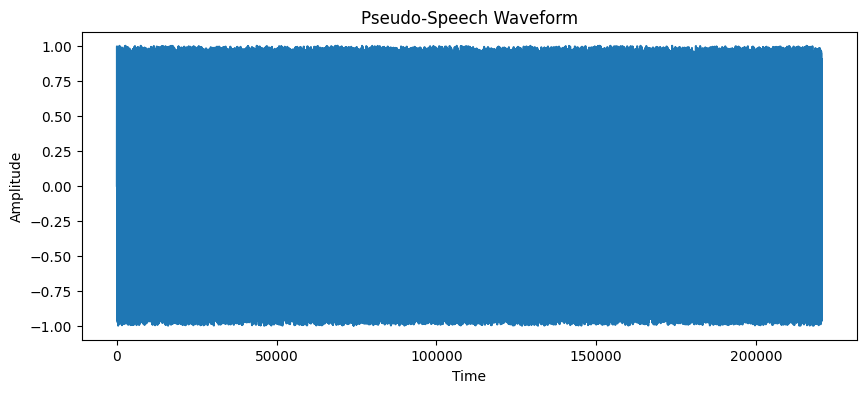

In [4]:
import matplotlib.pyplot as plt

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(pseudo_speech_signal)
plt.title("Pseudo-Speech Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()